# Lab 1: Basic Video **Operations**

# Introduction

The goal of this lab is to get familiar with how to process digital video by using Python. Specifically, by participating this lab you will:

Get basic knowledge on the processing of video frames;

Learn how to break a video file into frames and process individual frames for a color space conversion;
 
Generate video files from indexed frames.

Please follow these steps to prepare for the tasks:
1. Download the given video file in the course files and add it to the project files.
2. Import the libraries below.

In [1]:
#LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import pylab

# Tasks

Task 1. Frame Operations

1. Add code to the #VIDEO block to extract a random frame from your video file. Tip: The frames read out by cv2 can be worked on with numpy, pillow or matplotlib.

2. Finish the function in the #DISPLAY IMAGE block to show four pictures next to each other: The extracted color frame, and then its R, G and B layers as black and white pictures.  





PSNR for the two videos is:  54.12196102455395 dB


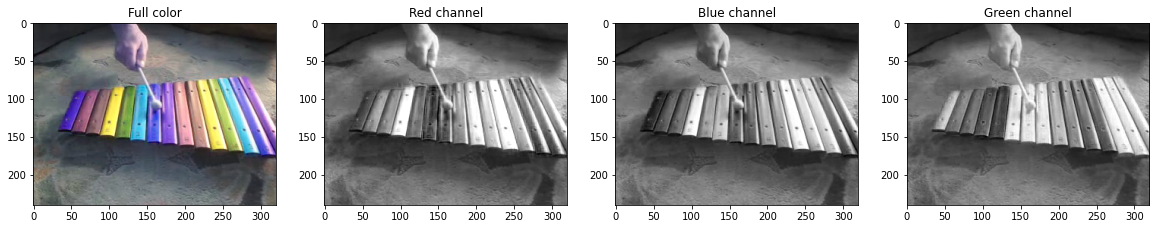

In [28]:
#VIDEO

import random

# Set up to read video. Set string to name of your clip.
cap = cv2.VideoCapture('test_video.mp4')

if cap.isOpened() == False:
    print("That's probably not the name of your clip")

# Some information about the video file
cap_e = int(cap.get(0)) # Elapsed video time in milliseconds
cap_w = int(cap.get(3)) # Frame width
cap_h = int(cap.get(4)) # Frame height
cap_r = int(cap.get(5)) # Frame rate
cap_l = int(cap.get(7)) # Length in number of frames
# Under VideoCapture::get is a list of attributes
# https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture-open

# Reads a random frame
stop = random.randrange(cap_l)

for i in range(stop):
    ret, frame = cap.read()
    if i == stop-1:
        
        rand_frame = frame
        dispimage(rand_frame)
        #frame_a = frameRGB2YUV(rand_frame)
        #frame_b = frameYUV2RGB(frame_a)
        #print(np.amax(rand_frame))
        #plt.imshow(frame_b)


cap = cv2.VideoCapture('test_video.mp4')

if cap.isOpened() == False:
    print("That's probably not the name of your clip")

# Set up to write video. You can set title and resolution.
result = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'MP4V'), cap_r, (cap_w, cap_h))

og_vid = []
new_vid = []

while True:
    # ret is true if video.read() returns a frame
    # frame is the frame returned
    ret, frame = cap.read()

    if ret is True:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        frame_a = frameRGB2YUV(frame)
        frame_b = frameYUV2RGB(frame_a)
        
        og_vid.append(frame)
        new_vid.append(frame_b)

        # Converts back to BGR before writing to video
        frame_b = cv2.cvtColor(frame_b, cv2.COLOR_RGB2BGR)
        result.write(frame_b)
        # dispimage(frame_b)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break

psnr = CalculatePSNR(og_vid, new_vid)
print("PSNR for the two videos is: ", psnr, "dB")

# Close downcap.release()
result.release()
cv2.destroyAllWindows()



In [2]:
# DISPLAY IMAGE
def dispimage(img):
    f, ax = plt.subplots(1, 4, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("Full color")

    ax[1].imshow(img[:,:,0], cmap="gray")
    ax[1].set_title("Red channel")

    ax[2].imshow(img[:,:,1], cmap="gray")
    ax[2].set_title("Blue channel")

    ax[3].imshow(img[:,:,2], cmap="gray")
    ax[3].set_title("Green channel")



Task 2: Color Space Conversion

The extracted image should be converted from the “RGB” format to a new color space “YUV” by 
1. Completing the function ‘frameRGB2YUV’. This function converts a RGB frame loaded from a video file to a YUV frame. In most real-world applications the color components U and V are usually down-sampled to a size of 1⁄2 of Y for saving communication bandwidth. This function should also downsample the frame and reconstruct it by upsampling. (Think about what the purpose of down- and upsampling is!)
2. Completing the function ‘frameYUV2RGB’, which is the inverse color transformation, that is, back to RGB from YUV. 
3. Completing the function ‘CalculatePSNR’, which should calculate the signal-to-noise ratio between two pictures. 

You can calculate the signal-to-noise ratio with this formula (i = image intensity): $$PSNR[dB] = 10 * \log_{10}{\frac{255^2}{(i_1-i_2)^2}}$$ 


In [3]:
#RGB2YUV

def frameRGB2YUV(RGBframe):
  # Transform RGB to YUV
  imagearray = np.array(RGBframe)
  imagearray = imagearray.astype("uint8")
  transform_matrix = np.array([[0.2126, 0.7152, 0.0722], [-0.09991, -0.33609, 0.436], [0.615, -0.55861, -0.05639]])
  YUVframe = np.matmul(imagearray, transform_matrix)
  y, u, v = cv2.split(YUVframe)

  # Downsamples/Upsamples
  dim_down = (int(u.shape[1] / 2), int(u.shape[0] / 2))
  dim_up = (int(u.shape[1]), int(u.shape[0]))
  
  u_comp = cv2.resize(cv2.resize(u, dim_down), dim_up)
  v_comp = cv2.resize(cv2.resize(v, dim_down), dim_up)

  YUVframe = cv2.merge((y, u_comp, v_comp))
  return YUVframe



In [4]:
#YUV2RGB

def frameYUV2RGB(YUVframe):
  # Transform YUV frame to RGB frame
  transform_matrix = np.array([[1, 0, 1.28033], [1, -0.21482, -0.38059], [1, 2.12798, 0]])
  RGB_frame = np.matmul(YUVframe, transform_matrix)
  
  RGB_frame = np.clip(RGB_frame, 0, 255)
  RGB_frame = RGB_frame.astype("uint8")

  return RGB_frame


In [18]:
#PSNR

# this function calculates the PSNR between two colour images, im1, im2
# you can use numpy.shape to check if two images are of the same size
# otherwise you can for example use numpy.resize to make them match
# PSNR should be in dB 

def CalculatePSNR_frame(im1, im2): 
    if im1.shape == im2.shape:
        return 10 * np.log10(255**2 / (np.mean(im1) - np.mean(im2))**2)

    
def CalculatePSNR(video1, video2):
    # Calculate PSNR for each frame
    psnr_list = []
    for i in range(len(video1)):
        psnr_list.append(CalculatePSNR_frame(video1[i], video2[i]))

    return np.mean(psnr_list)


Task 3: Assemble Your Video and Show
1. Adjust the code in the #VIDEO block so you no longer work only on one frame, but on all frames of your video. However, make sure to keep the funcionality to extract frames, as you will need it again. Convert the video from RGB2YUV, subsample it, upsample it, convert it back from YUV2RGB, and assemble all frames into a new video. 
2. Adjust the code in the #PSNR block to calculate the PSNR of the new video (not just a frame). Just as you should get one number from comparing two frames, you should get one number from comparing two entire videos. 
3. Download the new video and show it to TA. 




# Report

Your report should fill the following criteria:
1. A first page with all your group members' names.
2. An explanation of how you handled the downsampling and upsampling of the U and V layers.  
3. The PSNR of your new video. 
4. Your entire notebook, with relevant images and string plotted and printed. 

Submit your report as a **single pdf**, combined from your text and your notebook.

Upload your report to “Assignments/Lab1”.

Deadline is 23 April 2021 23:59

